In [122]:
def escaleta():
    '''
    1. #Importar Librerías
    2. #explorar csv migration_spain
    3. #Verificacion nulos y tamaños
    4. #Encabezados separar comunidades de códigos
    5. #Convertir a valores absolutos, habían datos con signo negativo
    6. #Encabezados separar año de semestre

    
    7. #Tabla agrupada por comunidades autónomas
    8. #CCAA ortenadas de mayor a menor
    8. #Análsis gráfico por CCAA
    9. #Web Scrapping datos.gob.es
    10. #Request, conctada
    11. #print(data) 
    12. #Importando beautiful Soup
    13. #encontramos links que tengan coincidencias con el contenido de "csv"
    14. #Descargamos el link del año 2022 para obtener datos
    15. 
    16. 
    17. 
    

       
    '''
    return None

help(escaleta)

Help on function escaleta in module __main__:

escaleta()
    1. #Importar Librerías
    2. #explorar csv



In [2]:
#Importar Librerías
#%pip install ipython
#%pip install pandas
#%pip install seaborn
#%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import pylab as plt   
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')   # para quitar esos prints

In [4]:
#explorar csv
migration = pd.read_csv('./data/migration_spain.csv', sep=';', error_bad_lines=False, encoding='utf-8')
migration.head()

,Comunidades y ciudades autónomas,Sexo,País de nacimiento,Grupo quinquenal de edad,Periodo,Total
0,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2022S1,1433
1,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S2,968
2,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S1,634
3,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S2,721
4,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S1,754


In [135]:
#Verificacion nulos y tamaños
migration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20938 entries, 0 to 20937
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Comunidades y ciudades autónomas  20938 non-null  object
 1   Sexo                              20938 non-null  object
 2   País de nacimiento                20938 non-null  object
 3   Grupo quinquenal de edad          20938 non-null  object
 4   Periodo                           20938 non-null  object
 5   Total                             20938 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 981.6+ KB


In [137]:
nan_cols = migration.isna().sum()

nan_cols[nan_cols>0]

Series([], dtype: int64)

In [156]:
#Encabezados, separar comunidades de códigos
df_mig= migration[['Codigo', 'Comunidades']] = migration['Comunidades y ciudades autónomas'].str.split(' ', 1, expand=True)
migration.head()

,Comunidades y ciudades autónomas,Sexo,País de nacimiento,Grupo quinquenal de edad,Periodo,Total,Codigo,Comunidades
0,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2022S1,1433,01,Andalucía
1,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S2,968,01,Andalucía
2,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S1,634,01,Andalucía
3,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S2,721,01,Andalucía
4,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S1,754,01,Andalucía


In [159]:
#Convertir a valores absolutos, habían datos con signo negativo
migration['Total'] = abs(migration['Total'])

In [204]:
#Encabezados, separar año de semestre
df_mig= migration[['año', 'semestre']] = migration['Periodo'].str.split('S', 1, expand=True)
migration.head()

,Comunidades y ciudades autónomas,Sexo,País de nacimiento,Grupo quinquenal de edad,Periodo,Total,Codigo,Comunidades,año,semestre
0,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2022S1,1433,01,Andalucía,2022,1
1,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S2,968,01,Andalucía,2021,2
2,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S1,634,01,Andalucía,2021,1
3,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S2,721,01,Andalucía,2020,2
4,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S1,754,01,Andalucía,2020,1


In [205]:
#Seleccionar solo los valores del 2022
df_2022 = migration[migration['año'] == 2022]

In [206]:
df_2022

,Comunidades y ciudades autónomas,Sexo,País de nacimiento,Grupo quinquenal de edad,Periodo,Total,Codigo,Comunidades,año,semestre


In [166]:
#Tabla agrupada por comunidades autónomas
pivot_ccaa = pd.pivot_table(migration, values='Total', index='Comunidades', aggfunc='sum')

In [177]:
#CCAA ortenadas de mayor a menor
df_ccaa= pivot_ccaa
df_ccaa.sort_values(by='Total', ascending=False)

,Total
Comunidades,
Cataluña,824097
"Madrid, Comunidad de",735798
Comunitat Valenciana,446285
Andalucía,420326
Canarias,243067
País Vasco,142322
"Balears, Illes",131847
"Murcia, Región de",125528
Castilla - La Mancha,119145


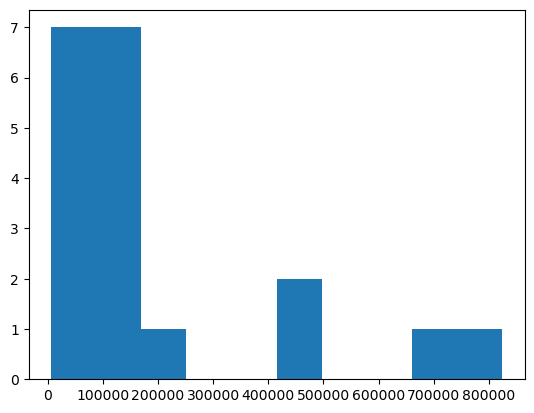

In [188]:
#Análsis gráfico por CCAA

plt.hist(df_ccaa['Total'])
plt.show()



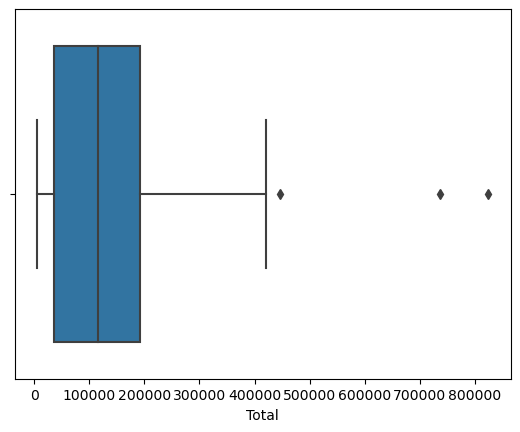

In [189]:
sns.boxplot(x=df_ccaa['Total'])
plt.show()

In [42]:
#Web Scrapping datos.gob.es

#%pip install requests
import requests as req   
import json


In [51]:
url='https://datos.gob.es/es/catalogo/l01280796-inmigrantes-personas-atendidas-en-el-servicio-de-informacion-y-orientacion'

In [75]:
#Request, conctada
res = req.get(url)
res

<Response [200]>

In [191]:
data = res.text
#print(data)

In [82]:
#Importando beautiful Soup
import requests
from bs4 import BeautifulSoup


In [96]:
soup = BeautifulSoup(data, "html.parser")

In [98]:
#encontramos links que tengan coincidencias con el contenido de "csv"
links = soup.find_all('a')
csv_links = [link.get('href')
              for link in links if link.get('href') and '.csv' in link.get('href')]

In [99]:
csv_links

['https://datos.gob.es/es/catalogo/l01280796-inmigrantes-personas-atendidas-en-el-servicio-de-informacion-y-orientacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-5-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-7-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-9-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-10-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-12-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-14-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-16-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-18-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-20-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-22-inmigrantes-informacion.csv']

In [107]:
url_inm = 'https://datos.madrid.es/egob/catalogo/211388-22-inmigrantes-informacion.csv'
df2022 = pd.read_csv(url_inm, sep=';',encoding='ISO-8859-1')

In [108]:
#Descargamos el link del año 2022 para obtener datos
df2022


,Año,Mes,Sexo,Edad,Nacionalidad - País,Áreas geográficas,Nivel de estudios,Información gral,Sist. Jco Adttvo 1,Sist. Jco Adttvo 2,Sist. Jco Adttvo 3,Sist. Jco Adttvo 4,Sist. Salud,Sist. Empleo,Sist. Servicios Sociales,Sist. Educación,Sist. Vivienda,Situación Administrativa,Oficina
0,2022.0,Enero,Mujer,31 a 50 años,colombia,América Latina,Secundaria,NaN,tasas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Irregular,Oficina Norte
1,2022.0,Enero,Mujer,31 a 50 años,honduras,América Latina,Secundaria,NaN,Arraigo Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Irregular,Oficina Norte
2,2022.0,Enero,Hombre,31 a 50 años,perú,América Latina,Secundaria,NaN,Arraigo Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Irregular,Oficina Norte
3,2022.0,Enero,Mujer,31 a 50 años,colombia,América Latina,Secundaria,NaN,Arraigo Social,NaN,NaN,NaN,NaN,Habilidades y técnicas BAE,NaN,NaN,NaN,Turista,Oficina Norte
4,2022.0,Enero,Mujer,31 a 50 años,honduras,América Latina,Secundaria,NaN,Cita Brigada Provincial Extranjería,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ART,Oficina Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
df2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24036 entries, 0 to 24035
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       23745 non-null  float64
 1   Mes                       23745 non-null  object 
 2   Sexo                      23746 non-null  object 
 3   Edad                      23746 non-null  object 
 4   Nacionalidad - País       23743 non-null  object 
 5   Áreas geográficas         23746 non-null  object 
 6   Nivel de estudios         23746 non-null  object 
 7   Información gral          1849 non-null   object 
 8   Sist. Jco Adttvo 1        20833 non-null  object 
 9   Sist. Jco Adttvo 2        3340 non-null   object 
 10  Sist. Jco Adttvo 3        478 non-null    object 
 11  Sist. Jco Adttvo 4        69 non-null     object 
 12  Sist. Salud               534 non-null    object 
 13  Sist. Empleo              1320 non-null   object 
 14  Sist. 

In [192]:
nan_cols = df2022.isna().sum()

nan_cols[nan_cols>0]

Año                           291
Mes                           291
Sexo                          290
Edad                          290
Nacionalidad - País           293
Áreas geográficas             290
Nivel de estudios             290
Información gral            22187
Sist. Jco Adttvo 1           3203
Sist. Jco Adttvo 2          20696
Sist. Jco Adttvo 3          23558
Sist. Jco Adttvo 4          23967
Sist. Salud                 23502
Sist. Empleo                22716
Sist. Servicios Sociales    23514
Sist. Educación             23188
Sist. Vivienda              23946
Situación Administrativa      290
Oficina                       291
dtype: int64

In [ ]:
#api ayuntamiento de madrid madrid

In [127]:
url_mad=('https://datos.madrid.es/egob/catalogo/title/Estructura de la población por nacionalidad..json')

In [128]:
res_mad = req.get(url_mad)
res_mad

<Response [200]>

In [118]:
res_mad.json()

{'format': 'linked-data-api',
 'version': '0.2',
 'result': {'first': 'https://datos.madrid.es/egob/catalogo/title/Estructura de la población por nacionalidad..json?_page=0',
  'items': [],
  'itemsPerPage': 50,
  'page': 0,
  'startIndex': 1,
  'total': 0,
  'type': ['http://purl.org/linked-data/api/vocab#ListEndpoint',
   'http://purl.org/linked-data/api/vocab#Page']}}

In [129]:
%%time

import time

posiciones = []

for i in range(50):
    
    res_mad = req.get(url_mad)
    
    data_mad = res_mad.json()
    
    posiciones.append(data_mad)
    
    time.sleep(0.5)
    

CPU times: user 1.71 s, sys: 157 ms, total: 1.87 s
Wall time: 42.2 s


In [132]:
import pandas as pd

df_mad=pd.DataFrame(res_mad)


df_mad

,0
0,"b'{ ""format"" : ""linked-data-api"", ""version"" : ..."
1,b' de la poblaci\xc3\xb3n por nacionalidad..js...
2,"b' ""type"" : [""http://purl.org/linked-data/api..."
